In [2]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
# unpatch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
df1 = pd.read_csv('student-por.csv', sep=';')
df1

# bool type

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<Axes: ylabel='Frequency'>

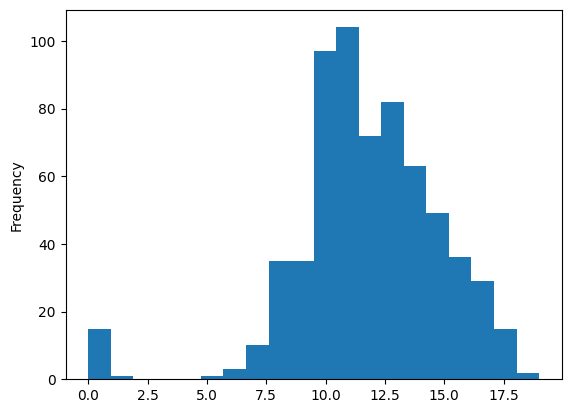

In [4]:
df1['G3'].plot(kind='hist', bins=20)

In [45]:
df1.columns.tolist()
booldict = {'yes': 1, 'no': 0}
originalname = [
'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3'
]
dtype = [
 'category',
 'category',
 np.float32,
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 'category',
 
 'category',
 'category',
 'category',
 'category',
 np.float32,
 
 np.float32,
 np.float32,
 np.float32,
]
bins = [-np.inf, 5, 10 , 15 , np.inf]

bins_total = [-np.inf, 35 , np.inf]

df1 = df1.astype(dict(zip(originalname, dtype)))
df1[df1.columns[15:23]] = df1[df1.columns[15:23]].apply(
 lambda x : x.map(booldict)
)

df1[df1.columns[15:23]] = df1[df1.columns[15:23]].astype('bool') 
# df1['failures'] = df1['failures'].astype('bool')
df1['G3_Cat'] = pd.cut(df1['G3'], bins=bins, labels=list(range(len(bins)-1)))
df1['total'] = df1[['G1', 'G2', 'G3']].sum(axis=1)
df1['total_Cat'] = pd.cut(df1['total'], bins=bins_total, labels=list(range(len(bins_total)-1)))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    float32 
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    category
 15  schoolsup   649 non-null    bool    
 16  famsup      649 non-null    bool    
 17  paid        649 non-null    bool    
 18  activities  649 non-null    bool    
 19  nursery 

In [46]:
# if dtype of df col is category change it to code
df1_backup = df1.copy(deep=True)
for col in df1.columns:
    if df1[col].dtype == 'category':
        df1[col] = df1[col].cat.codes.astype('category')

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    float32 
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    category
 15  schoolsup   649 non-null    bool    
 16  famsup      649 non-null    bool    
 17  paid        649 non-null    bool    
 18  activities  649 non-null    bool    
 19  nursery 

<Axes: >

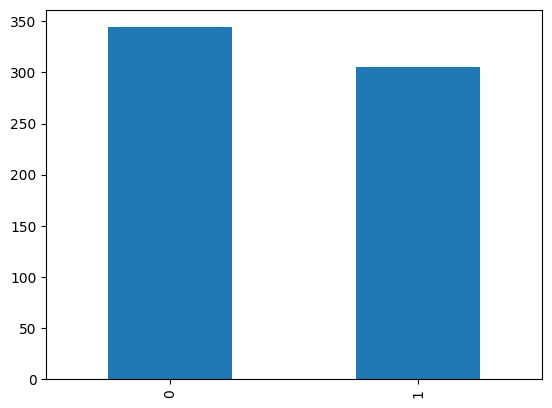

In [48]:
df1[df1.columns[-1]].value_counts().plot(kind='bar')

In [49]:
df1.corr(numeric_only=False)['G3'].abs().sort_values(ascending=False)

G3            1.000000
total         0.961829
G2            0.918548
G3_Cat        0.896434
G1            0.826387
total_Cat     0.737024
failures      0.393316
school        0.284294
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
address       0.167637
Mjob          0.148252
sex           0.129077
traveltime    0.127173
reason        0.124969
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
goout         0.087641
guardian      0.079609
famrel        0.063361
Fjob          0.052953
famsize       0.045016
Pstatus       0.000754
schoolsup          NaN
famsup             NaN
paid               NaN
activities         NaN
nursery            NaN
higher             NaN
internet           NaN
romantic           NaN
Name: G3, dtype: float64

In [50]:
df1['total'].describe()

count    649.000000
mean      34.875191
std        8.500083
min        4.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       56.000000
Name: total, dtype: float64

In [85]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import numpy as np
num_pipeline = Pipeline(
    steps=[
        # ('std', StandardScaler()),
        # ('imputer', SimpleImputer(strategy=''),
        ('knnimputer', KNNImputer(n_neighbors=3)),
        ('iqr', RobustScaler()),
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ('OrdinalEncoder', OrdinalEncoder()),
        # ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
    ]
)

preprocessing = ColumnTransformer(
    [
    ("num",
    num_pipeline, 
     make_column_selector(dtype_include=np.number),
    #  list(range()),
     ),
    ('cat',
     cat_pipeline, 
    #  df.columns[1],
     make_column_selector(dtype_include='category')
    )
    ]
)

model = Pipeline(
    [
    ('preprocess', preprocessing),
    ('model', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
    # 
    # ('rf', RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=42))
    ]
)
model

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('knnimputer',
                                                                   KNNImputer(add_indicator=False,
                                                                              copy=True,
                                                                              keep_empty_features=False,
                                                                              metric='nan_euclidean',
                                                                              missing_values=nan,
                                                                              n_neighbors=3,
                                                                              weights='uniform')),
                                                                  ('iqr',
                                                                   Ro...
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=1000,
                                                                  multi_class='auto',
                                                                  n_jobs=None,
                                                                  penalty='l2',
                                                                  random_state=None,
                                                                  solver='lbfgs',
                                                                  tol=0.0001,
                                                                  verbose=0,
                                                                  warm_start=False),
                                     n_jobs=None, verbose=0))],
         verbose=False)

In [87]:
df1.columns[-1],  df1.columns[:-6]

('total_Cat',
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
        'Walc', 'health', 'absences'],
       dtype='object'))

In [95]:

features = df1.columns[:-6].tolist()
target  = 'faires'
try:
    features.remove(target)
except:
    target = 'total_Cat'


X = df1[    features    ]
y = df1[target]


# y = y.map({0: False})
# y.fillna(True, inplace=True)


In [96]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)
model.score(X_test,y_test)

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))
confusion_matrix(y_test, model.predict(X_test))

# model[:-1].get_feature_names_out()

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       275
           1       0.72      0.75      0.73       244

    accuracy                           0.74       519
   macro avg       0.74      0.74      0.74       519
weighted avg       0.75      0.74      0.74       519

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        69
           1       0.70      0.74      0.72        61

    accuracy                           0.73       130
   macro avg       0.73      0.73      0.73       130
weighted avg       0.73      0.73      0.73       130



array([[50, 19],
       [16, 45]], dtype=int64)

c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:629: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

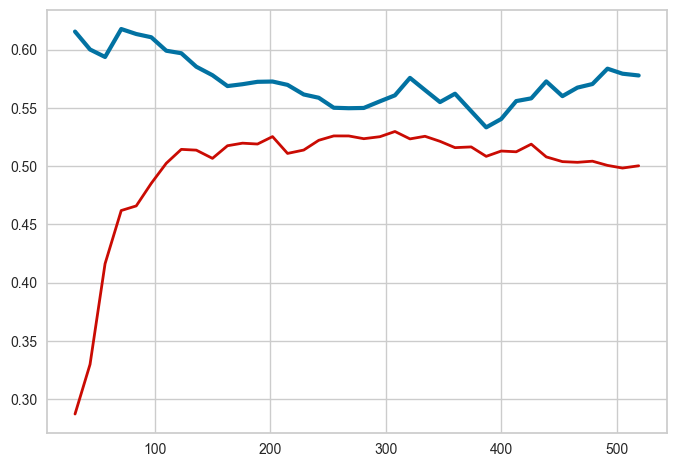

In [103]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, valid_scores = learning_curve(
    LogisticRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid") 
plt.xlabel("train size")
plt.ylabel("RMSE")
plt.title('RMSE vs train size')
plt.show()

In [72]:
from pycaret.classification import *


s = setup(
    
    data = df1[
        df1.columns[:-6].tolist() + ['total_Cat']
        ],
    target='total_Cat',
    session_id=123,
    
)


,Description,Value
0,Session id,123
1,Target,total_Cat
2,Target type,Binary
3,Original data shape,"(649, 31)"
4,Transformed data shape,"(649, 85)"
5,Transformed train set shape,"(454, 85)"
6,Transformed test set shape,"(195, 85)"
7,Numeric features,2
8,Categorical features,20
9,Preprocess,True


c:\Users\Administrator\anaconda3\envs\EXAM_ML\lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [60]:
best = s.compare_models(sort='mcc', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7113,0.0000,0.7273,0.6841,0.7006,0.4225,0.4276,0.4560
rf,Random Forest Classifier,0.7047,0.0000,0.6948,0.6847,0.6859,0.4076,0.4117,0.0590
ridge,Ridge Classifier,0.7005,0.0000,0.7134,0.6753,0.6908,0.4007,0.4042,0.0380
ada,Ada Boost Classifier,0.6983,0.0000,0.6948,0.6825,0.6837,0.3957,0.4006,0.0480
nb,Naive Bayes,0.6719,0.0000,0.8879,0.6034,0.7175,0.3589,0.3999,0.0380
et,Extra Trees Classifier,0.6980,0.0000,0.6998,0.6747,0.6836,0.3953,0.3990,0.0580
lda,Linear Discriminant Analysis,0.6961,0.0000,0.7087,0.6707,0.6857,0.3918,0.3955,0.0390
gbc,Gradient Boosting Classifier,0.6958,0.0000,0.6760,0.6763,0.6707,0.3887,0.3942,0.0540
lightgbm,Light Gradient Boosting Machine,0.6895,0.0000,0.6807,0.6694,0.6692,0.3768,0.3821,0.1060
xgboost,Extreme Gradient Boosting,0.6851,0.0000,0.6517,0.6768,0.6570,0.3660,0.3726,0.0580


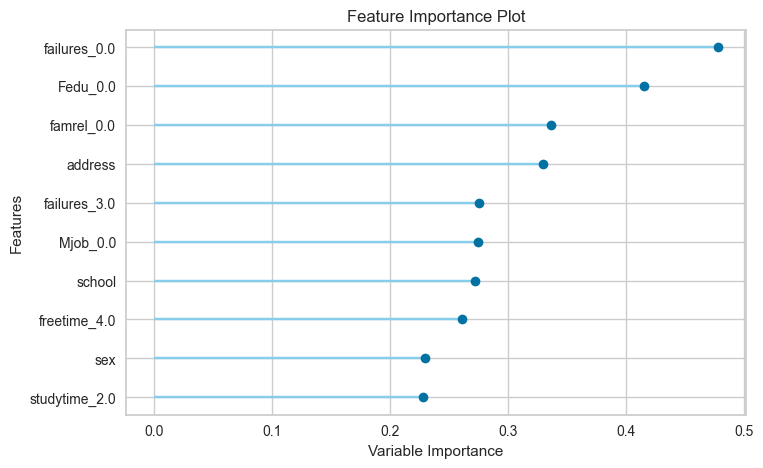

In [102]:
plot_model(best[2], plot='feature')

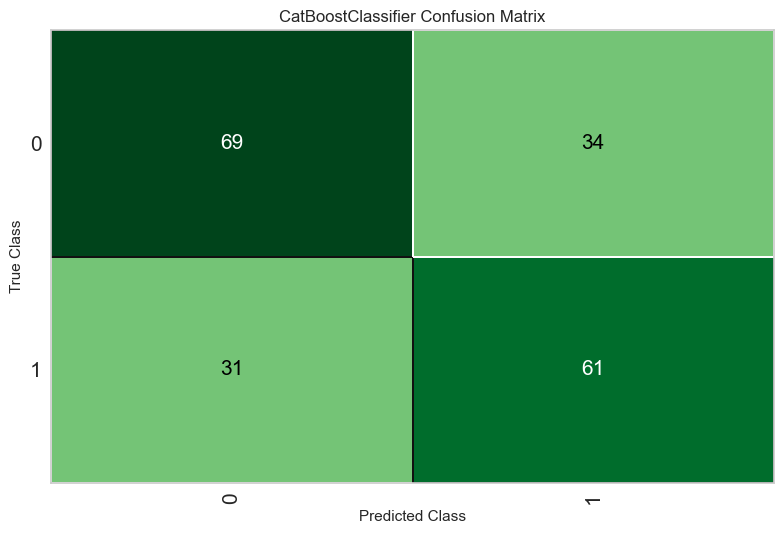

In [97]:
plot_model(best[0], plot='confusion_matrix')

In [68]:
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…